In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

## Augment the Data using ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator( 
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,  
  validation_split=0.2,                   
#   preprocessing_function=keras.applications.vgg16.preprocess_input
  )

test_datagen= ImageDataGenerator(
  rescale=1./255)

## Load Dataset

In [17]:
#train and test dataset paths
train_path='dataset/train'  
test_path='dataset/test'

# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(train_path, 
                                       target_size=[224,224],
                                       color_mode='rgb', 
                                       class_mode="categorical", 
                                       batch_size = 32, 
                                       shuffle=True,
                                       subset='training') 


validation_generator = train_datagen.flow_from_directory(train_path, 
                                       target_size=[224,224],
                                       color_mode='rgb', 
                                       class_mode="categorical",
                                       batch_size = 32,
                                       shuffle=True,
                                       subset='validation') 

# load and iterate testing dataset 
test_generator = test_datagen.flow_from_directory(test_path, 
                                      target_size=[224,224],                                    
                                      color_mode='rgb', 
                                      class_mode="categorical",
                                      batch_size = 32) 

Found 896 images belonging to 6 classes.
Found 222 images belonging to 6 classes.
Found 88 images belonging to 6 classes.


In [4]:
train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [5]:
validation_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [6]:
test_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

# **Building The Deep Model Using Cnn**

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


model0 = keras.models.Sequential()

model0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(64, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Flatten())

model0.add(layers.Dense(512, activation='relu'))
model0.add(layers.Dense(6,activation='softmax'))

In [8]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [9]:
model0.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the cnn model with 20 epochs

In [10]:
history0 = model0.fit(train_generator,
          validation_data=validation_generator,
          steps_per_epoch=train_generator.samples/train_generator.batch_size, 
          validation_steps=validation_generator.samples/validation_generator.batch_size, 
          epochs=20)

Epoch 1/20
28/28 [==============================] - 94s 3s/step - loss: 1.6795 - accuracy: 0.2734 - val_loss: 1.2946 - val_accuracy: 0.4730
Epoch 2/20
28/28 [==============================] - 88s 3s/step - loss: 1.0685 - accuracy: 0.5681 - val_loss: 0.9307 - val_accuracy: 0.5901
Epoch 3/20
28/28 [==============================] - 89s 3s/step - loss: 0.7401 - accuracy: 0.7109 - val_loss: 0.6534 - val_accuracy: 0.7252
Epoch 4/20
28/28 [==============================] - 88s 3s/step - loss: 0.8384 - accuracy: 0.6674 - val_loss: 0.6689 - val_accuracy: 0.7523
Epoch 5/20
28/28 [==============================] - 87s 3s/step - loss: 0.5978 - accuracy: 0.7835 - val_loss: 0.5523 - val_accuracy: 0.8153
Epoch 6/20
28/28 [==============================] - 88s 3s/step - loss: 0.5862 - accuracy: 0.8013 - val_loss: 0.4490 - val_accuracy: 0.8649
Epoch 7/20
28/28 [==============================] - 87s 3s/step - loss: 0.4698 - accuracy: 0.8382 - val_loss: 0.6062 - val_accuracy: 0.8018
Epoch 8/20
28/28 [==

# Plotting Training and Validation **Accuracy**


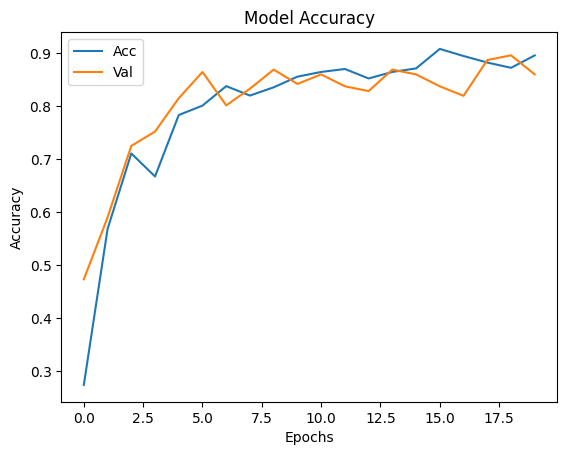

In [11]:
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

# Plotting Training and Validation **Error**

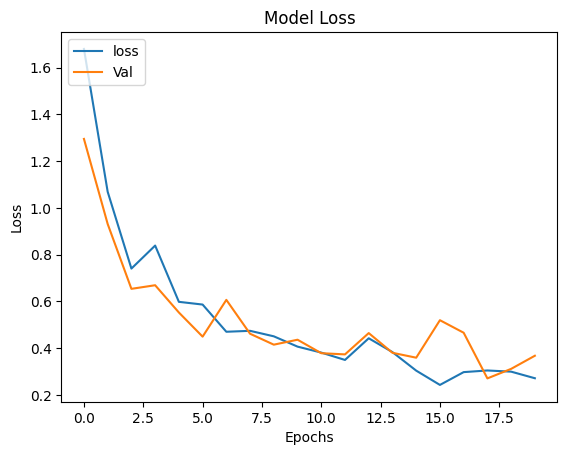

In [12]:
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

# Evaluating the model on test data (bad loss result given)

In [10]:
result0=model0.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
print(result0)

print('Error on testing dataset: ', result0[0])
print('Accuracy on testing dataset: ', result0[1])

NameError: name 'test_generator' is not defined

## Saving the model

In [16]:
model0.save('./rottenvsfresh_cnn_model.h5')

## Loading the model

In [3]:
from keras.models import load_model
model0=load_model('./rottenvsfresh_cnn_model.h5')

# **Building The Deep Model Using Pretrained VGG16 Model**

## Load VGG16 Model with ImageNet weights
#### And also remove the last layer of the model.
### Transfer Learning

In [5]:
vgg16_model=keras.applications.VGG16(weights='imagenet',input_shape=(224, 224, 3),include_top=False) 
#input_shape=(224,224,3),pictures of dataset are in color so they have three dimensions:height,width,number of channels which are three (red,green,blue)
# vgg16_model = keras.applications.ResNet50(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(224, 224, 3)
# )

# The 5 blocks of VGG16 Pretrained Model

In [6]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Adding layers to the pretrained VGG16 model
#### the last dense layer has the same number of neurons of the classes in the dataset.
### Freeze the model


In [7]:
vgg16_model.trainable = False

In [8]:
# Create inputs with correct shape
inputs = vgg16_model.input

# Call the VGG16 model
x = vgg16_model(inputs,training=False)

#pooling layer 
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer with softmax as activation function
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model1 = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 14717766 (56.14 MB)
Trainable params: 3078 (12.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Compile Model with categorical_crossentropy as loss function and adam optimizer

In [13]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')   

## Training the Model with 20 epochs

In [18]:
history1 = model1.fit(train_generator,
          validation_data=validation_generator,
          steps_per_epoch=train_generator.samples/train_generator.batch_size, 
          validation_steps=validation_generator.samples/validation_generator.batch_size, 
          epochs=20)

Epoch 1/20
28/28 [==============================] - 145s 5s/step - loss: 1.7836 - accuracy: 0.2902 - val_loss: 1.6505 - val_accuracy: 0.4505
Epoch 2/20
28/28 [==============================] - 161s 6s/step - loss: 1.5829 - accuracy: 0.5737 - val_loss: 1.5125 - val_accuracy: 0.6216
Epoch 3/20
28/28 [==============================] - 152s 5s/step - loss: 1.4439 - accuracy: 0.6350 - val_loss: 1.3866 - val_accuracy: 0.6892
Epoch 4/20
28/28 [==============================] - 154s 5s/step - loss: 1.3263 - accuracy: 0.7321 - val_loss: 1.3028 - val_accuracy: 0.7658
Epoch 5/20
28/28 [==============================] - 152s 5s/step - loss: 1.2287 - accuracy: 0.7690 - val_loss: 1.1924 - val_accuracy: 0.8018
Epoch 6/20
28/28 [==============================] - 153s 5s/step - loss: 1.1519 - accuracy: 0.7734 - val_loss: 1.1256 - val_accuracy: 0.7973
Epoch 7/20
28/28 [==============================] - 152s 5s/step - loss: 1.0862 - accuracy: 0.7846 - val_loss: 1.0693 - val_accuracy: 0.7748
Epoch 8/20
28

# Plotting Training and Validation **Accuracy**

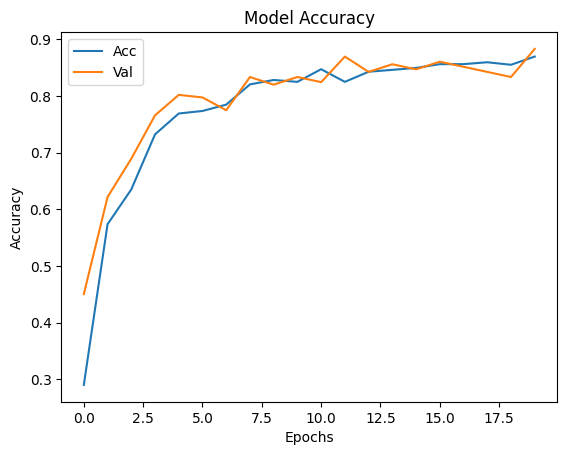

In [19]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

# Plotting Training and Validation **Error**

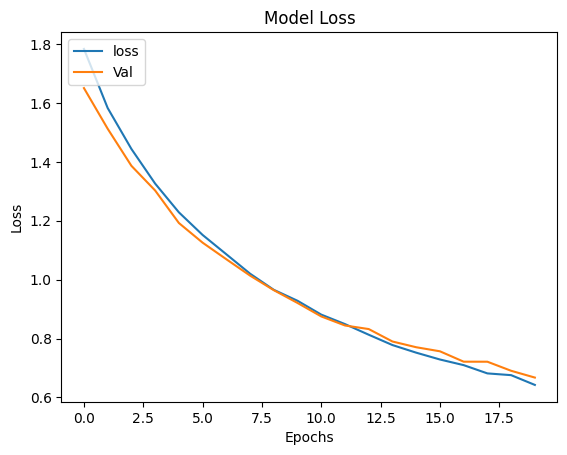

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

# Evaluating the model on the testing dataset

In [21]:
result1=model1.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
print(result1)
print('Error on testing dataset: ', result1[0])
print('Accuracy on testing dataset: ', result1[1])

2/2 [==============================] - 34s 11s/step - loss: 1.5867 - accuracy: 0.5114
[1.5866634845733643, 0.5113636255264282]
Error on testing dataset:  1.5866634845733643
Accuracy on testing dataset:  0.5113636255264282


## Saving the model

In [22]:
model1.save('./rottenvsfresh_vgg16_model.h5')

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading the model (the best model)

In [23]:
from keras.models import load_model
model1=load_model('./rottenvsfresh_vgg16_model.h5')